In [3]:
import numpy as np

import pandas as pd

import pandas_datareader.data as pdr

import matplotlib.pyplot as plt

import datetime

import torch

import torch.nn as nn

from torch.autograd import Variable

import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
 
# Training/Test ratio = 7:3

Train_ratio = 0.7

Test_ratio = 0.3

In [5]:
 

# Data load

dataset = pd.read_csv('아파트매매가격지수_경기도.csv',index_col = 0)

df = dataset.T
df

date,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01
수원시,63.4,63.3,63.2,63.3,63.4,63.5,63.4,63.2,63.2,63.4,...,97.3,100.0,102.4,104.7,106.5,108.4,109.5,109.8,109.8,109.6
성남시,67.8,67.2,66.9,67.1,67.5,67.9,67.7,67.4,67.4,67.5,...,99.1,100.0,101.3,102.6,103.6,104.3,104.8,105.1,105.1,105.0
의정부시,77.7,77.4,76.9,76.4,76.4,76.2,75.5,75.2,75.1,75.2,...,97.2,100.0,101.8,103.8,105.2,106.5,107.2,107.4,107.4,107.3
안양시,60.5,60.2,60.0,59.8,59.6,59.5,59.5,59.4,59.5,59.8,...,95.2,100.0,103.2,106.2,108.3,110.5,111.7,112.0,111.8,111.6
부천시,68.1,67.7,67.4,67.4,67.6,67.6,67.5,67.2,67.2,67.8,...,97.2,100.0,102.0,104.5,106.7,108.7,110.2,110.8,110.8,110.7
광명시,53.0,52.9,52.6,52.6,52.9,53.0,53.1,52.9,53.1,53.1,...,98.4,100.0,102.0,104.0,105.5,106.7,107.3,107.4,107.3,107.3
평택시,92.6,92.5,92.4,92.4,92.4,92.6,92.5,92.3,92.3,92.4,...,95.2,100.0,103.0,106.2,108.8,111.7,113.2,114.1,114.3,114.3
동두천시,92.6,90.9,90.1,90.0,89.8,89.6,89.3,89.0,88.9,89.0,...,97.2,100.0,102.0,104.5,106.4,107.3,107.7,107.5,107.5,107.4
안산시,66.8,66.6,66.3,66.3,66.6,66.8,66.7,66.5,66.6,66.9,...,95.0,100.0,102.8,105.0,107.1,109.3,110.7,111.2,111.3,111.3
고양시,69.5,69.0,68.6,68.1,68.1,68.0,67.9,67.9,68.1,68.5,...,98.5,100.0,101.4,103.1,105.0,106.7,107.6,108.0,108.1,108.0


In [6]:
x = df.iloc[0:,0:-1]

y = df.iloc[:,-1:]

In [7]:
 

# Data Division

train_x = x.iloc[0:int(len(df)*Train_ratio),:]

train_y = y.iloc[0:int(len(df)*Train_ratio),:]

test_x = x.iloc[int(len(df)*Train_ratio):,:]

test_y = y.iloc[int(len(df)*Train_ratio):,:]

 

In [8]:
# Normalizing , 둘다 학습하여 성능비교할것

minmax = MinMaxScaler()

standard = StandardScaler()

 

train_x = minmax.fit_transform(train_x)

train_y = minmax.fit_transform(train_y)

test_x = minmax.fit_transform(test_x)

test_y = minmax.fit_transform(test_y)

 

In [9]:
# Check Data pre-processing

print("Training shape : ", train_x.shape, train_y.shape)

print("Test shape : ",test_x.shape, test_y.shape)

 

Training shape :  (19, 109) (19, 1)
Test shape :  (9, 109) (9, 1)


In [10]:
# Numpy array상태로는 학습이 불가능하므로, Torch Variable 형태로 변경(data/grad/grad_fn)

train_x_tensor = Variable(torch.Tensor(train_x))

train_y_tensor = Variable(torch.Tensor(train_y))

#print("After torch variable shape_Train : ",train_x_tensor.shape, train_y.shape)

 

test_x_tensor = Variable(torch.Tensor(test_x))

test_y_tensor = Variable(torch.Tensor(test_y))

#print("After torch Variable shape_Test : ",test_x_tensor.shape, test_y_tensor.shape)

 

train_x_tensor_final = torch.reshape(train_x_tensor, (train_x_tensor.shape[0], 1, train_x_tensor.shape[1]))

train_y_tensor_final = torch.reshape(train_y_tensor, (train_y_tensor.shape[0], 1, train_y_tensor.shape[1]))

test_x_tensor_final = torch.reshape(test_x_tensor, (test_x_tensor.shape[0], 1, test_x_tensor.shape[1]))

test_y_tensor_final = torch.reshape(test_y_tensor,(test_y_tensor.shape[0], 1, test_y_tensor.shape[1]) )

print(train_x_tensor_final.shape, test_x_tensor_final.shape)

 

torch.Size([19, 1, 109]) torch.Size([9, 1, 109])


In [11]:
# LSTM network modeling

class LSTM_Jun(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) : 

        super(LSTM_Jun, self).__init__()

        self.num_classes = num_classes

        self.num_layers = num_layers

        self.input_size = input_size

        self.hidden_size = hidden_size

        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)

        self.layer_1 = nn.Linear(hidden_size, 256)

        self.layer_2 = nn.Linear(256,256)

        self.layer_3 = nn.Linear(256,128)

        self.layer_out = nn.Linear(128, num_classes)

        self.relu = nn.ReLU() #Activation Func

 

    def forward(self,x):

        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Hidden State

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Internal Process States

 

        output, (hn, cn) = self.lstm(x, (h_0, c_0))

 

        hn = hn.view(-1, self.hidden_size) # Reshaping the data for starting LSTM network

        out = self.relu(hn) #pre-processing for first layer

        out = self.layer_1(out) # first layer

        out = self.relu(out) # activation func relu

        out = self.layer_2(out)

        out = self.relu(out)

        out = self.layer_3(out)

        out = self.relu(out)

        out = self.layer_out(out) #Output layer

        return out

 

In [12]:
# Code Main

num_epochs = 100000

learning_rate = 0.005

input_size = int(len(x.columns))

hidden_size = 2 # number of features in hidden state

num_layers = 1

num_classes = int(len(y.columns))

 

LSTM_Jun = LSTM_Jun(num_classes, input_size, hidden_size, num_layers, train_x_tensor_final.shape[1]).to(device)

 

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(LSTM_Jun.parameters(), lr = learning_rate)

 

for epoch in range(num_epochs) : 

    outputs = LSTM_Jun.forward(train_x_tensor_final.to(device))

    optimizer.zero_grad()

    loss = loss_function(outputs, train_y_tensor.to(device))

    loss.backward()

    optimizer.step() # improve from loss = back propagation

    if epoch % 500 == 0 :

        print("Epoch : %d, loss : %1.5f" % (epoch, loss.item()))

Epoch : 0, loss : 0.32283
Epoch : 500, loss : 0.03223
Epoch : 1000, loss : 0.03223
Epoch : 1500, loss : 0.03223
Epoch : 2000, loss : 0.03230
Epoch : 2500, loss : 0.03230
Epoch : 3000, loss : 0.03223
Epoch : 3500, loss : 0.03223
Epoch : 4000, loss : 0.03223
Epoch : 4500, loss : 0.03223
Epoch : 5000, loss : 0.00002
Epoch : 5500, loss : 0.00000
Epoch : 6000, loss : 0.00000
Epoch : 6500, loss : 0.00000
Epoch : 7000, loss : 0.00000
Epoch : 7500, loss : 0.00000
Epoch : 8000, loss : 0.00000
Epoch : 8500, loss : 0.00000
Epoch : 9000, loss : 0.00000
Epoch : 9500, loss : 0.00000
Epoch : 10000, loss : 0.00000
Epoch : 10500, loss : 0.00000
Epoch : 11000, loss : 0.00000
Epoch : 11500, loss : 0.00000
Epoch : 12000, loss : 0.00000
Epoch : 12500, loss : 0.00000
Epoch : 13000, loss : 0.00000
Epoch : 13500, loss : 0.00000
Epoch : 14000, loss : 0.00000
Epoch : 14500, loss : 0.00000
Epoch : 15000, loss : 0.00000
Epoch : 15500, loss : 0.00000
Epoch : 16000, loss : 0.00000
Epoch : 16500, loss : 0.00007
Epoc

In [13]:
# Estimated Value

test_predict = LSTM_Jun(test_x_tensor_final.to(device)) #Forward Pass

predict_data = test_predict.data.detach().cpu().numpy() #numpy conversion

predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)

In [14]:
# Real Value

real_data = test_y_tensor.data.numpy() # Real value

real_data = minmax.inverse_transform(real_data) #inverse normalization 

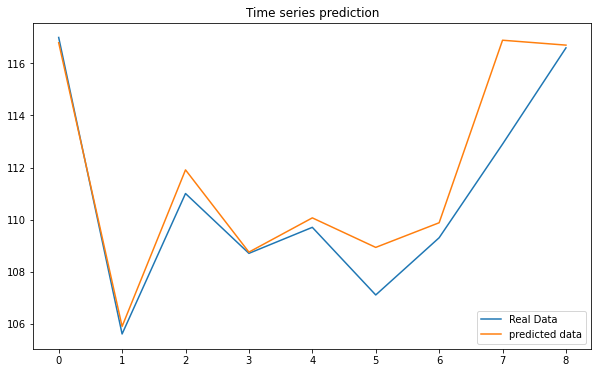

In [15]:
#Figure

plt.figure(figsize = (10,6)) # Plotting
plt.plot(real_data, label = 'Real Data')
plt.plot(predict_data, label = 'predicted data')
plt.title('Time series prediction')
plt.legend()
plt.show()